# 가설 검정을 통한 금융 데이터 분석 기초

데이터 분석은 가설 검정의 연속이다. 굳이 분석 속도를 늦추며 가설 검정을 하는 이유는 데이터를 바라볼 때 가능한 주관과 직감을 배제하기 위함이며 분석의 방향을 잃지 않도록 단계별로 구체적인 '목적'을 가지기 위함이다. <br><br>
가설 검정을 통해 데이터를 분석하는 습관을 기르면 처음에는 속도가 더딜지라도 **결국 정확하고 객관적이며 빠른 속도로 결론에 도달할 수 있다.**<br><br>
따라서 본문을 통해 작은 고민도 가설을 세우고 객관적으로 풀어가는 연습을 하고자 한다.

목차:

```
Step 1. 카카오 주식을 1999년 11월 11일에 100만원 치 샀다면 오늘 얼마일까?
     1-1. 라이브러리 호출 및 데이터 확인
     1-2. 가설 검정
Step 2. 카카오 주가는 언제나 상승장이었을까?
     2-1. 가설 검정(일봉 차트)
     2-2. 가설 검정(365일 이동평균선)
```

## 1. 카카오 주식을 1999년 11월 11일에 100만원 치 샀다면 오늘 얼마일까?

예상컨데 엄청난 돈이 되었을 것이다. 그런데 정확히 얼마가 되었을 지 궁금하지 않은가? 이러한 작은 고민에서도 가설 검정을 시작해볼 수 있다.

## 1-1. 라이브러리 호출 및 데이터 확인

먼저 우리가 사용할 라이브러리를 불러온다.

1. 데이터 확보를 위해 금융 데이터를 편하게 가져올 수 있는 `FinanceDataReader`를 사용할 것이고, 
2. 데이터프레임이라는 파이썬 자료형을 편하게 다루기 위해 `pandas`를 사용한다. 
3. 마지막으로 시각화를 위해 `matplotlib`과 `seaborn`패키지를 사용하며 
4. 주피터노트북에서 종종 나타나는 불필요한 경고를 숨기기 위해 `warnings`패키지도 사용하겠다.(치명적이라면 경고가 아니라 에러가 바로 뜨고 코드가 실행되지 않으니 걱정하지 말자)



In [2]:
import FinanceDataReader as fdr

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['classic']) # 테마: 주식 차트 느낌내기

import warnings
warnings.filterwarnings(action='ignore')

다음으로 카카오 종목코드를 인자로 넣어서 카카오 주가 정보를 확보한다.

In [3]:
stock_kakao = fdr.DataReader('035720')
stock_kakao

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2021-08-31,152500,155000,151000,155000,3078357,0.023102
2021-09-01,155000,156000,154000,154000,2011434,-0.006452
2021-09-02,154500,156000,153500,155000,1649156,0.006494


## 1-2. 가설 검정

카카오 주식을 1999년 11월 11일에 100만원 치 샀다면 오늘 얼마일까?

일반적인 수준에서 "100배 올랐다" 하면 주식으로 정말 많이 벌었다고 할 수 있다. 
- 귀무가설) 카카오 주가는 100배 혹은 그 미만으로 올랐다
- 연구가설) 카카오 주가는 100배를 초과하여 올랐다


In [4]:
# 오타 방지를 위해 컬럼명 소문자로 변경
stock_kakao.columns = stock_kakao.columns.str.lower()
stock_kakao.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change'], dtype='object')

In [5]:
# 수익 계산을 위해 첫날 주가로 전체 종가 나누기 
stock_kakao['yield'] = stock_kakao['close']/stock_kakao['close'][0]

# 첫날 매입한 카카오 주식의 총 가격을 100만원으로 환산
stock_kakao['yield'] *= 1000000

# 소수점 이하 제거
stock_kakao['yield'] = stock_kakao['yield'].astype('int64')
stock_kakao['yield']

# 보기 쉽게 '천' 단위 구분자 포함된 문자열로 변환
# ## ex) 1.000000e+06 --> "1,000,000.0"
stock_kakao['yield'] = stock_kakao['yield'].apply(lambda x : '{:,}'.format(x))
stock_kakao['yield']

Date
1999-11-11      1,000,000
1999-11-12      1,116,116
1999-11-15      1,250,250
1999-11-16      1,397,397
1999-11-17      1,562,562
                 ...     
2021-08-31    155,155,155
2021-09-01    154,154,154
2021-09-02    155,155,155
2021-09-03    156,656,656
2021-09-06    155,655,655
Name: yield, Length: 5388, dtype: object

새 천년이 시작하기 직전에 카카오 주식을 100만원치만 사놓고 잊고 지냈다면 지금쯤 1억 5천만원을 벌었다. **150배 넘개 올랐기 때문에 귀무가설을 기각한다.**

## 2. 카카오 주가는 언제나 상승장이었을까?

주가가 매입 금액 대비 150배가 올랐다면 쉬지 않고 주가가 올랐을 것만 같다.(카카오가 코로나사태 이후 급상승한 것은 알아도 모르는 척 하자 우리는 직감과 경험을 최대한 배제한다.) 이것을 어떻게 데이터로 확인할 수 있을까? 

## 2-1. 가설 검정(일봉 차트)

먼저 단순히 일봉 차트를 그려볼 수 있다. 다시 말하지만 직감적으로 하루 정도는 주가가 빠졌을 것이라 생각할 수 있지만 직감을 완벽히 배제한다. 

- 귀무가설) 카카오 주가는 하루도 빠짐없이 올랐다.
- 연구가설) 카카오 주가는 최소 하루 이상 내렸다.

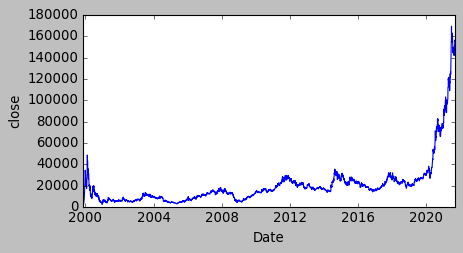

In [13]:
# 그래프 가로로 길게 수정
plt.figure(figsize=(6,3))

# x축은 날짜(Index), y축은 종가(close 컬럼)로 해서 선형 그래프를 그려본다.
sns.lineplot(x=stock_kakao.index, y=stock_kakao['close']);


주가의 자잘한 오르내림을 수도 없이 볼 수 있다. **귀무 가설을 기각한다.** 그렇다면 하루 이틀이 아니라 전체 기간의 주가 추세는 어땠을까? 그 전에, 그런 주가 추세를 데이터로 어떻게 볼 수 있을까?

## 2-2. 가설 검정(365일 이동평균선)


우리에게 익숙한 '이동평균선'을 활용하면 된다. '이동평균선'은 말그대로 n일간 주가 평균의 움직임을 말한다. 여기서 몇 일을 기준으로 할 것인가는 중요하다. 너무 적은 숫자(20일, 30일) 안에서는 등락이 클 것이기 때문에 "최소 연간 평균치의 움직임은 항상 상승했을 것이다" 라는 기준으로 이동평균선을 확인해보는 것이 좋다.<br><br>

예시에 따라 365일 평균 데이터를 들여다보자.


- 귀무가설) 카카오 주가의 365일 이동평균선은 항상 상승했다.
- 연구가설) 카카오 주가의 365일 이동평균선은 항상 상승하지 않았다.(내리막이 있었다.)

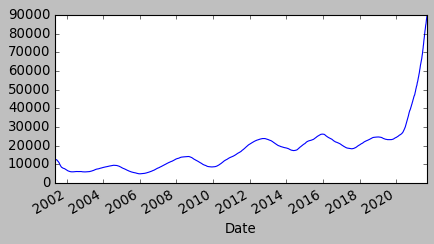

In [12]:
# 그래프 가로로 길게 수정
plt.figure(figsize=(6,3))

# 300일 이동평균 데이터 확보
kakao_moving_avg_365 = stock_kakao['close'].rolling(window=365).mean()

# 300일 이동평균 데이터는 지난 300일간 주가를 평균낸 데이터다.
# 따라서 가장 앞의 299일치 데이터는 NaN으로 처리된다.
# 그래프를 그리기 위해 NaN값을 제거한다.
kakao_moving_avg_365 = kakao_moving_avg_365.dropna()

# 300일 이평선을 그린다
kakao_moving_avg_365.plot();


카카오는 안타깝게도 최소 2019년까지(굉장히 최근이다) ~~개잡주~~라 불리며 고통 받았을 것만 같다. 그러나 끝까지 믿어준(코로나로 떡락할때까지도) 우리 주주들에게 "기다려주셔서 감사합니다"하고 선물하듯 수직 상승 하고있다.

2019년~2020년 초까지 고통받은 고통받은 카카오 주주들을 위로하며 **귀무가설을 기각한다.**